In [1]:
from Krighaar import *

x: [-5.        -4.8989899 -4.7979798 -4.6969697 -4.5959596]
y: [0.06633491 0.00862039 0.09469926 0.19180682 0.02819476]
y_err: [0.1 0.1 0.1 0.1 0.1]


<ErrorbarContainer object of 3 artists>

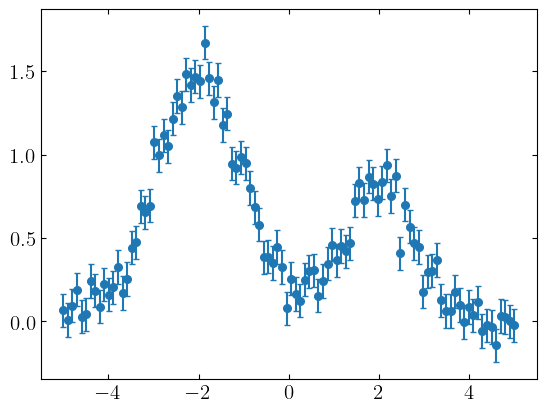

In [2]:
def generate_dataset(size=100, noise_level=0.1):
    np.random.seed(42)  # For reproducibility

    x = np.linspace(-5, 5, size)
    
    # Parameters for three Gaussian functions
    params1 = [1.5, -2, 1]
    params2 = [0.8, 2, 0.8]

    y = (
        gauss(x, *params1) +
        gauss(x, *params2) +
        np.random.normal(0, noise_level, size)
    )

    y_err = np.full_like(y, noise_level)

    return x, y, y_err

# Generate dataset
x_data, y_data, y_err_data = generate_dataset()

# Print a few data points for illustration
print("x:", x_data[:5])
print("y:", y_data[:5])
print("y_err:", y_err_data[:5])

plt.errorbar(x_data, y_data, yerr=y_err_data, fmt='.')

Given names not corresponding to function, overwriting...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 74.02                      │              Nfcn = 292              │
│ EDM = 5.94e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A1     │   1.479   │   0.030   │            │            │         │         │       │
│ 1 │ mu1    │  -1.992   │   0.023   │            │            │         │         │       │
│ 2 │ sigma1 │   0.971   │   0.024   │            │            │   0.5   │    2    │       │
│ 3 │ A2     │   0.823   │   0.034   │            │            │   0.5   │         │       │
│ 4 │ mu2    │   1.98    │   0.04    │            │            │         │         │       │
│ 5 │ sigma2 │   0.79    │   0.04    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────┐
│        │        A1       mu1    sigma1        A2       mu2    sigma2 │
├────────┼─────────────────────────────────────────────────────────────┤
│     A1 │  0.000907 -1.02e-05 -0.000426 -3.85e-05 -6.81e-05  0.000119 │
│    mu1 │ -1.02e-05  0.000515  1.76e-05     4e-05  4.98e-05 -0.000105 │
│ sigma1 │ -0.000426  1.76e-05  0.000568  7.19e-05  0.000112 -0.000209 │
│     A2 │ -3.85e-05     4e-05  7.19e-05   0.00115  1.33e-05 -0.000826 │
│    mu2 │ -6.81e-05  4.98e-05  0.000112  1.33e-05   0.00135 -4.05e-05 │
│ sigma2 │  0.000119 -0.000105 -0.000209 -0.000826 -4.05e-05   0.00162 │
└────────┴─────────────────────────────────────────────────────────────┘

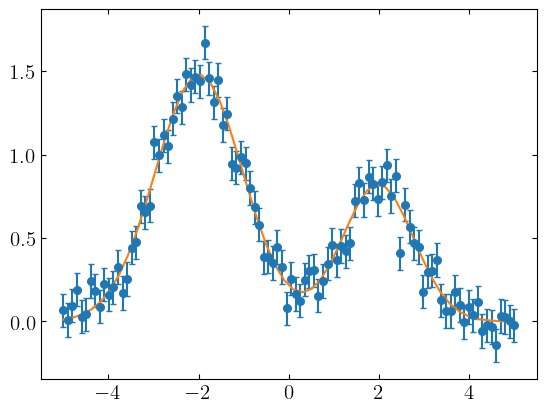

In [3]:

params = {'A1': 1.4, 'mu1':1, 'sigma1': -2, 'A2': 0.8, 'mu2': 2, 'sigma2': 1}

limits = {'sigma1': (0.5, 2),'A2':(0.5,None)}

gaussN_fit = fit(x_data, y_data, y_err_data, gaussN, params,limits=limits)
display(gaussN_fit.hesse())



x_range = np.linspace(min(x_data), max(x_data))
plt.errorbar(x_data, y_data, yerr=y_err_data, fmt='.')
plt.plot(x_range, gaussN(x_range, *gaussN_fit.values))


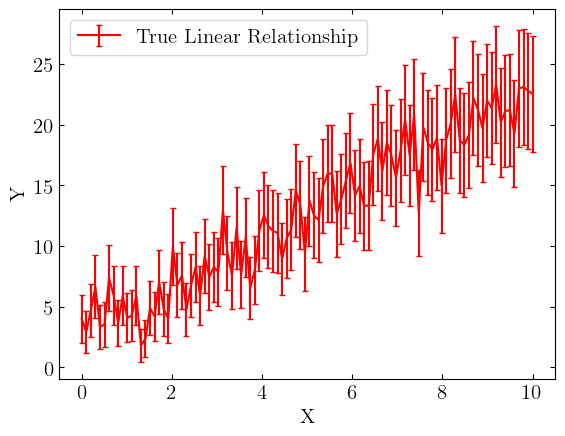

Given names not corresponding to function, overwriting...


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 38.88                      │              Nfcn = 41               │
│ EDM = 2.34e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b1   │   2.05    │   0.11    │            │            │         │         │       │
│ 1 │ a    │    2.2    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │      b1       a │
├────┼─────────────────┤
│ b1 │  0.0121 -0.0399 │
│  a │ -0.0399   0.221 │
└────┴─────────────────┘

In [4]:
np.random.seed(42)

# Parameters for the linear equation
slope = 2
intercept = 3

# Generate linearly spaced x values
x_values = np.linspace(0, 10, 100)

# Generate linear y values with some random noise
y_values = slope * x_values + intercept + np.random.normal(scale=2, size=len(x_values))

y_err = np.sqrt(y_values)


plt.errorbar(x_values, y_values, y_err, color='red', label='True Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


guess = {'b1': 4, 'a':1}

lin_fit = fit(x_values, y_values, y_err, lin, guess)
display(lin_fit.hesse())

